<a href="https://colab.research.google.com/github/mufidahluthfiany/Posttest-2-Data-Mining/blob/main/Posttest_2_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:

# data in form transaction list
data = [['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

df = pd.DataFrame(data)
df = pd.get_dummies(df.stack()).sum(level=0)
print(df)

    beef  butter  butter milk  canned beer  cling film/bags  curd  \
0      0       0            0            0                0     0   
1      0       0            0            0                0     0   
2      0       0            0            0                0     0   
3      0       0            0            1                0     0   
4      0       0            0            0                0     0   
5      0       0            0            0                0     0   
6      0       0            0            0                0     0   
7      0       0            0            0                0     0   
8      0       0            0            0                0     1   
9      1       0            0            0                0     0   
10     0       1            0            0                0     0   
11     0       0            0            0                0     0   
12     0       0            0            0                0     0   
13     0       0            1     

<ipython-input-12-f09ad9f3b546>:24: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df = pd.get_dummies(df.stack()).sum(level=0)


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# data in the transaction list
data = [    ['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

# mengonversi data ke format pengkodean one - hot
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# temukan itemsets (support) yang sering muncul dengan Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# temukan association rules dengan Association Rule Mining algorithm
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# buat table of support untuk itemsets
df_support = frequent_itemsets
df_support['support'] = df_support['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_support = df_support.rename(columns={"itemsets": "itemset"})
df_support = df_support.set_index('itemset')
print(df_support)

# buat table of support dan confidence for rules
df_rules = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# filter rules dengan hanya 1 antecedent dan 1 consequent
df_rules = df_rules[df_rules['antecedents'].apply(lambda x: len(x) == 1) & df_rules['consequents'].apply(lambda x: len(x) == 1)]

# format antecedent dan consequent kolom
df_rules['antecedents'] = df_rules['antecedents'].apply(lambda x: list(x)[0])
df_rules['consequents'] = df_rules['consequents'].apply(lambda x: list(x)[0])

# tetapkan antecedent sebagai indeks dan urutkan berdasarkan confidence
df_rules = df_rules.set_index('antecedents')
df_rules = df_rules.sort_values(by=['confidence'], ascending=False)

# membuat tabel support dan confidence untuk filtered rules
df_rules = df_rules[['consequents', 'support', 'confidence']]
df_rules['support'] = df_rules['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_rules['confidence'] = df_rules['confidence'].apply(lambda x: "{:.2f}%".format(x*100))
print("\n")
print("HASIL SUPPORT DAN CONFIDENCE")
print("\n")

print(df_rules)


                                                   support
itemset                                                   
(beef)                                               5.26%
(butter)                                             5.26%
(butter milk)                                        5.26%
(canned beer)                                        5.26%
(cling film/bags)                                    5.26%
...                                                    ...
(whole milk, semi-finished bread, sausage)           5.26%
(sausage, yogurt, semi-finished bread)               5.26%
(whole milk, sausage, yogurt)                        5.26%
(whole milk, yogurt, semi-finished bread)            5.26%
(whole milk, yogurt, semi-finished bread, sausage)   5.26%

[65 rows x 1 columns]


HASIL SUPPORT DAN CONFIDENCE


                             consequents support confidence
antecedents                                                
white bread                         beef   5.26%    100.0

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

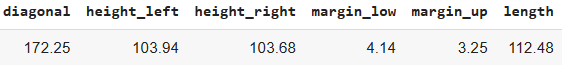
<!-- 1412 -->

In [ ]:
import pandas as pd
import math

In [ ]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi

# Membuat data frame
df = pd.read_csv('deteksi_uang_palsu.csv')

# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df['jarak'] = df.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 +
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length       jarak  
0  113.02  162.985541  
1  113.74  163.637621  
2  113.12  163.039278  
3  113.30  163.154696  
4  113.46  163.132317  
5  110.9

In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

# load data
df = pd.read_csv("deteksi_uang_palsu.csv")

# hitung jarak dari setiap data 
target = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]
jarak = []
for i in range(len(df)):
    d = 0
    for j in range(1, 7):
        d += (df.iloc[i, j] - target[j-1])**2
    jarak.append(math.sqrt(d))
df['jarak'] = jarak

# urutkan data dari jarak terdekat
K = int(math.sqrt(len(df)))
df_sorted = df.sort_values(by='jarak').head(K)

# tampilkan data terurut
print(df_sorted)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
0  113.02  0.671267  
2  113.12  0.834626  
3  113.30  0.910934  


In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# tentukan nilai K
K = round(len(df)**0.5)

# ambil K data terdekat
k_nearest_neighbors = df_sorted[:K]

# hitung label terbanyak
prediction = pd.DataFrame(k_nearest_neighbors['is_genuine'].mode())

print("Hasil prediksi: ")
print(prediction)

Hasil prediksi: 
   is_genuine
0        True


# (3) Analisis

> Nama : Mufidah Luthfiany

> Nim : 2109116052


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

#"Student Mental health"

---
https://www.kaggle.com/datasets/shariful07/student-mental-health



In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
sns.set(style = 'whitegrid')
import textwrap

In [ ]:
df = pd.read_csv("Student Mental health.csv")
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [ ]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
df.tail()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No
100,18/07/2020 20:16:21,Male,20.0,Biomedical science,Year 2,3.00 - 3.49,No,No,No,No,No


In [ ]:
# df1 terdapat dataset dengan label target 21.0 
df1 = df[df['Age'] == 21.0]

# Menampilkan hasil filter
print(df1)

              Timestamp Choose your gender   Age What is your course?  \
1        8/7/2020 12:04               Male  21.0    Islamic education   
55       8/7/2020 15:58               Male  21.0                  BCS   
96  13/07/2020 19:56:49             Female  21.0                  BCS   

   Your current year of Study What is your CGPA? Marital status  \
1                      year 2        3.00 - 3.49             No   
55                     year 1        3.00 - 3.49             No   
96                     year 1        3.50 - 4.00             No   

   Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
1                       No                  Yes                        No   
55                      No                   No                        No   
96                      No                  Yes                        No   

   Did you seek any specialist for a treatment?  
1                                            No  
55                           

In [ ]:
# df2 dataset dengan label target mengalami depresi
df2 = df[df['Do you have Depression?'] != 'No']

# Menampilkan hasil filter
print(df2)

              Timestamp Choose your gender   Age What is your course?  \
0        8/7/2020 12:02             Female  18.0          Engineering   
2        8/7/2020 12:05               Male  19.0                  BIT   
3        8/7/2020 12:06             Female  22.0                 Laws   
6        8/7/2020 12:32             Female  23.0     Pendidikan islam   
11       8/7/2020 12:39             Female  24.0          Engineering   
12       8/7/2020 12:40             Female  18.0                  BCS   
17       8/7/2020 12:52             Female  24.0                  ENM   
19       8/7/2020 13:07             Female  18.0       Marine science   
24       8/7/2020 13:17             Female  23.0                  BCS   
27       8/7/2020 13:41               Male  18.0          Engineering   
28       8/7/2020 13:58             Female  24.0                  BIT   
33       8/7/2020 14:31               Male  18.0                  BCS   
34       8/7/2020 14:41             Female  19.0   

In [ ]:
# df3 dataset dengan label target female
df3 = df[df['Choose your gender'] == 'Female']

# Menampilkan hasil filter
print(df3)

              Timestamp Choose your gender   Age What is your course?  \
0        8/7/2020 12:02             Female  18.0          Engineering   
3        8/7/2020 12:06             Female  22.0                 Laws   
6        8/7/2020 12:32             Female  23.0     Pendidikan islam   
7        8/7/2020 12:33             Female  18.0                  BCS   
8        8/7/2020 12:35             Female  19.0      Human Resources   
..                  ...                ...   ...                  ...   
94  13/07/2020 17:30:44             Female  24.0                 Fiqh   
95  13/07/2020 19:08:32             Female  18.0    Islamic Education   
96  13/07/2020 19:56:49             Female  21.0                  BCS   
98  13/07/2020 21:22:56             Female  19.0             Nursing    
99  13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   

   Your current year of Study What is your CGPA? Marital status  \
0                      year 1        3.00 - 3.49        

In [ ]:
# df4 dataset dengan label target umur dibawah 20
df4 = df[df['Age'] < 20]

# Menampilkan hasil 
print(df4)

              Timestamp Choose your gender   Age What is your course?  \
0        8/7/2020 12:02             Female  18.0          Engineering   
2        8/7/2020 12:05               Male  19.0                  BIT   
5        8/7/2020 12:31               Male  19.0          Engineering   
7        8/7/2020 12:33             Female  18.0                  BCS   
8        8/7/2020 12:35             Female  19.0      Human Resources   
9        8/7/2020 12:39               Male  18.0                Irkhs   
12       8/7/2020 12:40             Female  18.0                  BCS   
13       8/7/2020 12:41               Male  19.0          Engineering   
14       8/7/2020 12:43             Female  18.0                KENMS   
19       8/7/2020 13:07             Female  18.0       Marine science   
20       8/7/2020 13:12             Female  19.0          Engineering   
21       8/7/2020 13:13             Female  18.0                  KOE   
25       8/7/2020 13:29             Female  18.0   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
df.select_dtypes(include=np.number)

,Age
0,18.0
1,21.0
2,19.0
3,22.0
4,23.0
...,...
96,21.0
97,18.0
98,19.0
99,23.0


In [ ]:
def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maximum         :", dfnum.max())

In [ ]:
tampil("Age")

Nilai minimum         : 18.0
Nilai maximum         : 24.0


In [ ]:
tampil("Your current year of Study")

Nilai minimum         : Year 1
Nilai maximum         : year 4


In [ ]:
tampil("What is your CGPA?")

Nilai minimum         : 0 - 1.99
Nilai maximum         : 3.50 - 4.00 


#Explore Data

##Visualisasi Comparison

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

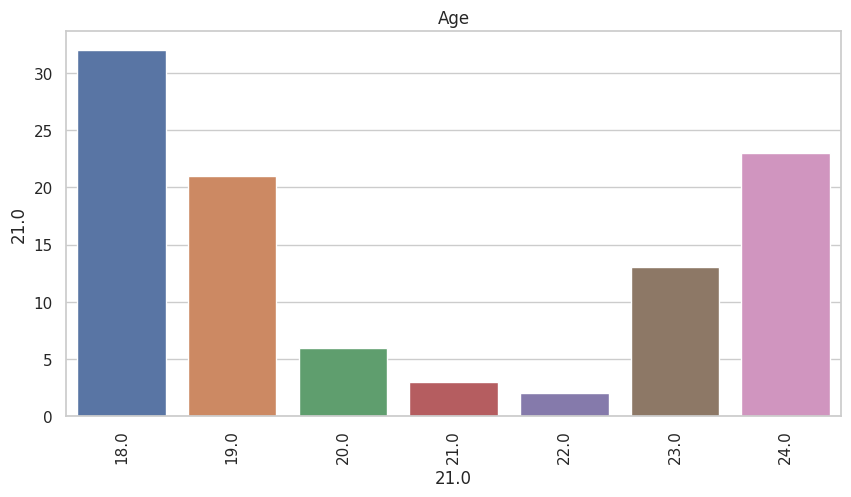

In [ ]:
country_count = Counter(df['Age'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Age')
plt.xlabel('21.0')
plt.ylabel('21.0')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [ ]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


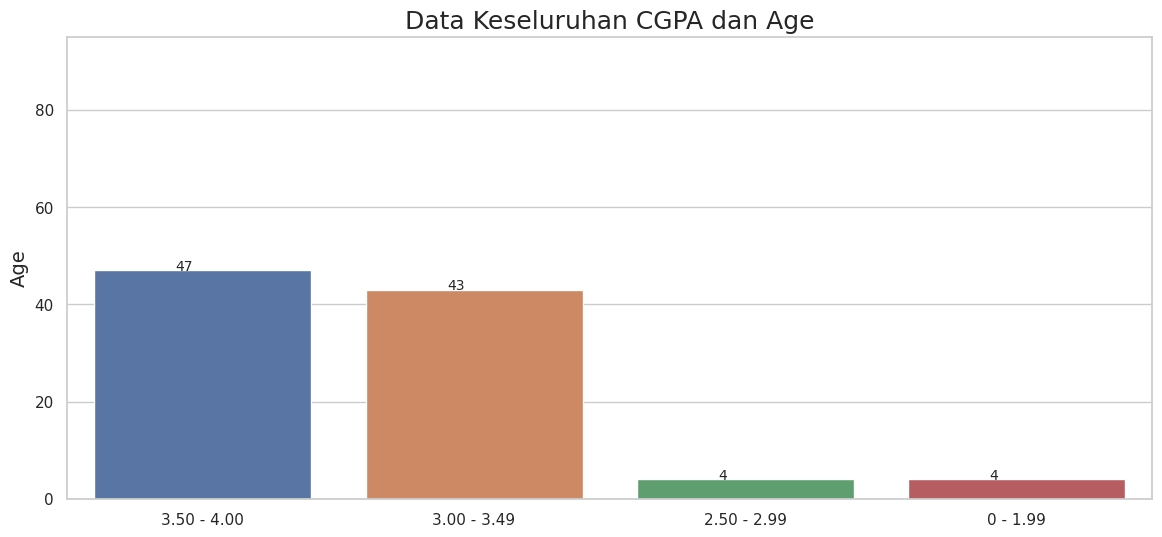

In [ ]:
fig, ax = plt.subplots(figsize = (14, 6))
max_width = 13

index = df['What is your CGPA?'].fillna('3.00-3.49').value_counts().index[0:4]
count = df['What is your CGPA?'].fillna('3.00-3.49').value_counts()[0:4]
sns.barplot(x = index, y = count, order = index)
ax.set_title('Data Keseluruhan CGPA dan Age', fontsize = 18)

for i, count in enumerate(count):
    ax.text(x=i-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Age', fontsize = 14)
ax.set_ylim(0, df['Marital status'].fillna('3.00-3.49').value_counts()[0]+10)

plt.show()

##Visualisasi Distribution

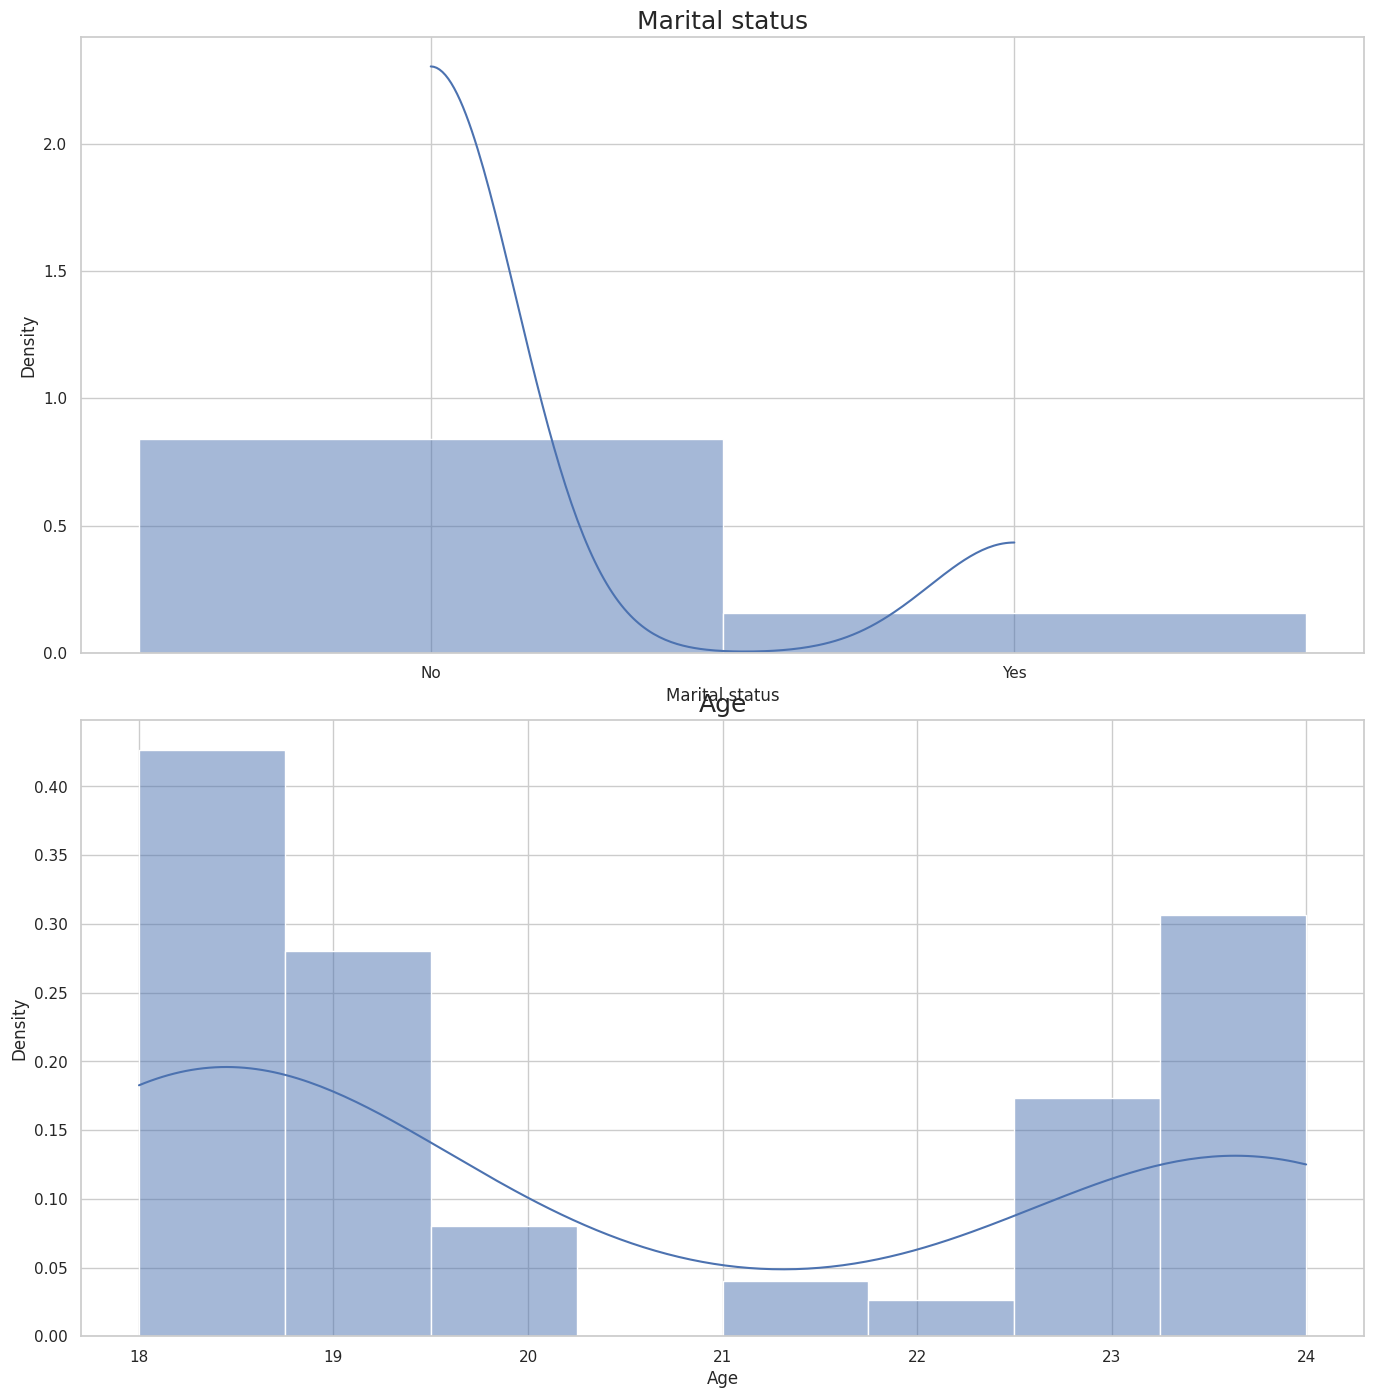

In [ ]:
# Mendefinisikan Kolom pada list 
num_cols = ['Marital status', 'Age']

# Membuat diagram
fig, ax = plt.subplots(2, figsize=(14, 14))
fig.tight_layout(pad=2)

for ax, col in zip(ax.flatten(), num_cols):
    sns.histplot(ax=ax, data=df, x=col, kde=True, stat='density')
    ax.set_title(col, fontsize=18)
    

plt.show()

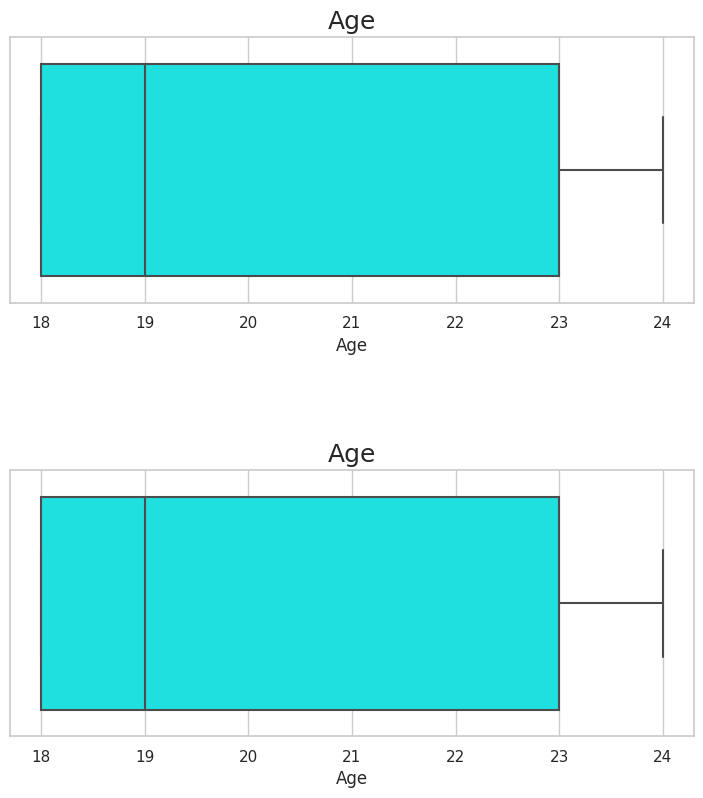

In [ ]:
num_cols = ['Age', 'Age']

fig, ax = plt.subplots(len(num_cols), 1, figsize = (10, 10))
fig.tight_layout(pad = 8)

for i, col in enumerate(num_cols):
    sns.boxplot(ax = ax[i], x = df[col], orient = 'h', color = 'aqua')
    ax[i].set_title(col, fontsize = 18)

plt.show()

##Visualisasi Relationship

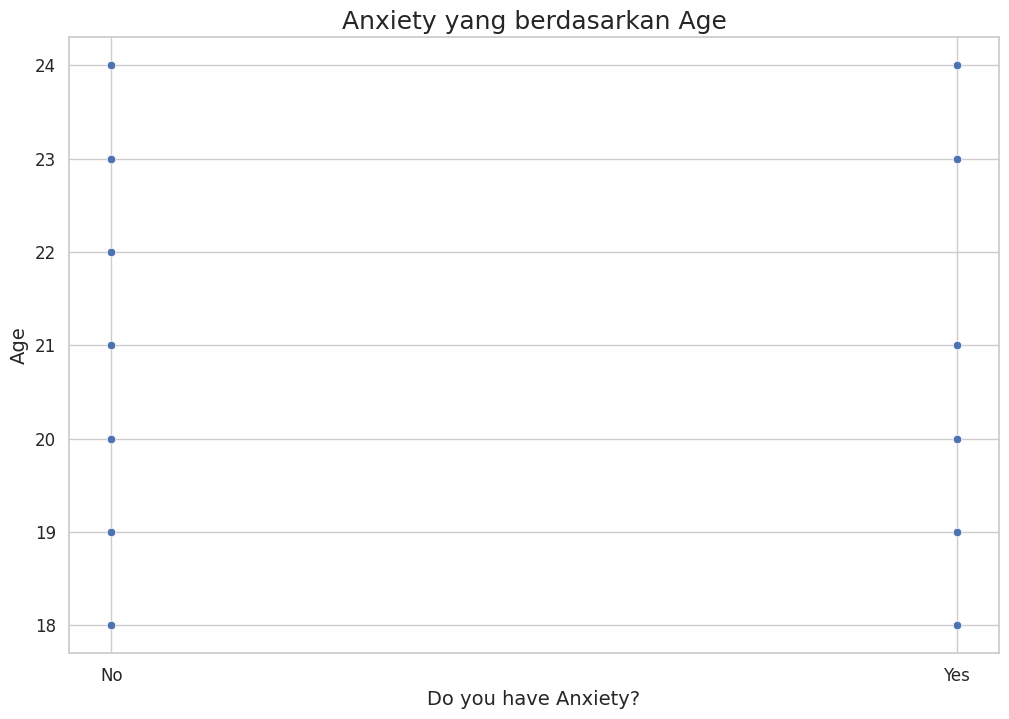

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x="Do you have Anxiety?", y="Age")
ax.set_title('Anxiety yang berdasarkan Age', fontsize=18)
ax.set_xlabel('Do you have Anxiety?', fontsize=14)
ax.set_ylabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##Visualisasi Composition

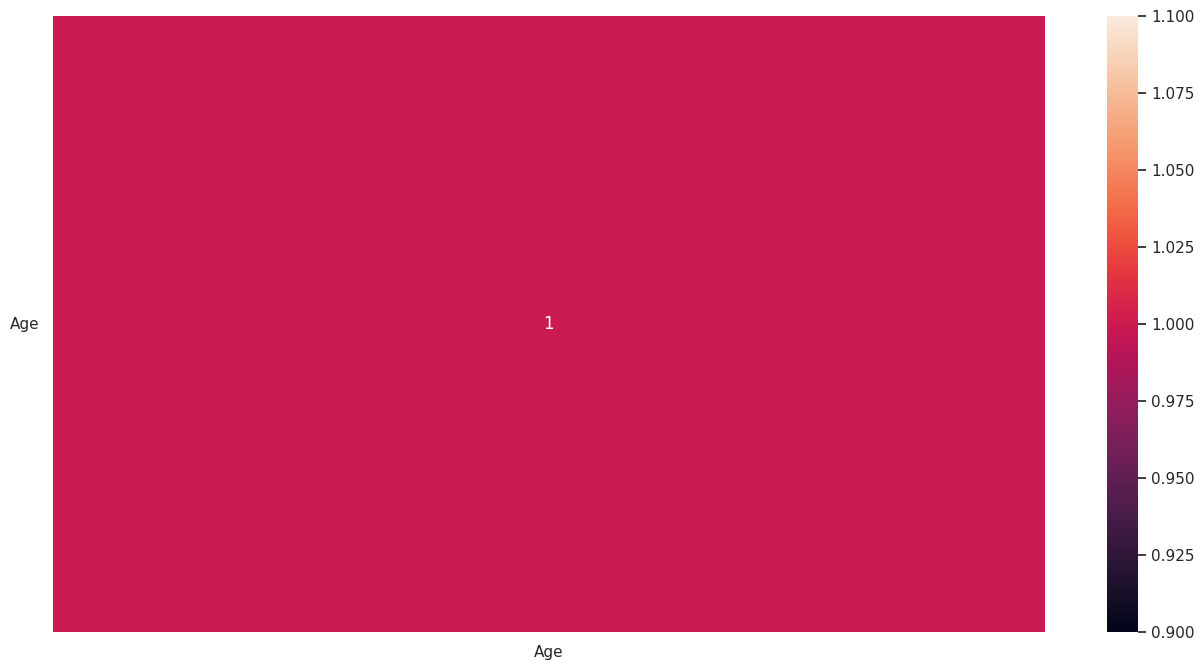

In [ ]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat.columns, rotation = 0)
plt.show()


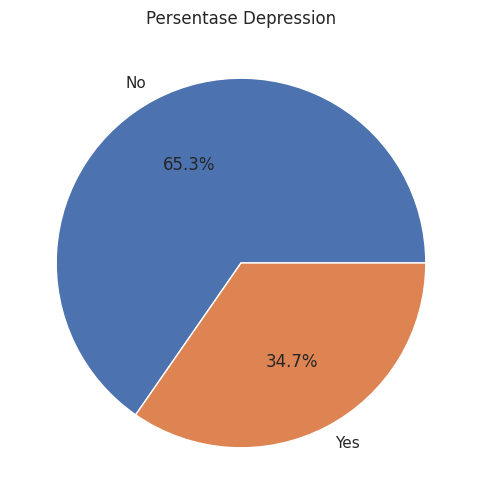

In [ ]:
#Kalkulasi count dari setiap Level category
level_count = df['Do you have Depression?'].value_counts()

#Membuat pie chart untuk Level categories
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(level_count, labels=level_count.index, autopct='%1.1f%%')
ax.set_title('Persentase Depression')
plt.show()

##Verify data quality

In [ ]:
# Periksa nilai yang hilang
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Periksa apakah ada duplikat
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Periksa untuk outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

# Periksa data types
print("Data types:\n", df.dtypes)

Missing values:
 Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64
Number of duplicate rows: 0
Outliers:
 Age                                             0
Choose your gender                              0
Did you seek any specialist for a treatment?    0
Do you have Anxiety?                            0
Do you have Depression?                         0
Do you have Panic attack?                       0
Marital status                                  0
Timestamp                      

<ipython-input-41-7d8f5bb30924>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


##Data Preparation

##Select Data

In [ ]:
import pandas as pd
df = pd.read_csv("Student Mental health.csv")

In [ ]:
# Hanya menampilkan 2 kolom
selected_data = df[["Choose your gender", "Age"]]

# Menampilkan Perintah
print(selected_data.head())

  Choose your gender   Age
0             Female  18.0
1               Male  21.0
2               Male  19.0
3             Female  22.0
4               Male  23.0


In [ ]:
# Menampilkan 3 kolom 
selected_data = df[["Choose your gender", "Age", "Marital status"]]

# Menampilkan perintah
print(selected_data.head())

  Choose your gender   Age Marital status
0             Female  18.0             No
1               Male  21.0             No
2               Male  19.0             No
3             Female  22.0            Yes
4               Male  23.0             No


##Clean Data

In [ ]:
df.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:
df.isna().sum() / len(df) * 100

Timestamp                                       0.000000
Choose your gender                              0.000000
Age                                             0.990099
What is your course?                            0.000000
Your current year of Study                      0.000000
What is your CGPA?                              0.000000
Marital status                                  0.000000
Do you have Depression?                         0.000000
Do you have Anxiety?                            0.000000
Do you have Panic attack?                       0.000000
Did you seek any specialist for a treatment?    0.000000
dtype: float64

In [ ]:
df["Choose your gender"] = df["Choose your gender"].fillna(df["Choose your gender"].mode()[0])
df["Age"] = df["Age"].fillna(df["Age"].mode()[0])
df["Marital status"] = df["Marital status"].fillna(df["Marital status"].mode()[0])

df.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:
df.isna().sum() / len(df) * 100

Timestamp                                       0.0
Choose your gender                              0.0
Age                                             0.0
What is your course?                            0.0
Your current year of Study                      0.0
What is your CGPA?                              0.0
Marital status                                  0.0
Do you have Depression?                         0.0
Do you have Anxiety?                            0.0
Do you have Panic attack?                       0.0
Did you seek any specialist for a treatment?    0.0
dtype: float64

##Construct Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Student Mental health.csv")

In [ ]:
# Membuat DataFrame dummy untuk contoh
data = {'Your current year of Study': ['year 1', 'year 2', 'year 3', 'year 4'],
        'Age': [18.0, 21.0, 22.0, 23.0]}
       

df = pd.DataFrame(data)

# Menghitung Usia dari setiap murid di databank
df["Age"] = df['Age'] / ((df['Age'] / 100) ** 2)

# Menghapus kolom yang tidak diperlukan
df = df.drop('Age', axis=1)

# Menampilkan DataFrame setelah Construct Data
print(df)


  Your current year of Study
0                     year 1
1                     year 2
2                     year 3
3                     year 4


##Integrate Data

In [ ]:
df = pd.read_csv('Student Mental health.csv')

# Melakukan perubahan pada nilai data tertentu
df.loc[df['Your current year of Study'] == 'nilai_awal', 'Your current year of Study'] = 'nilai_baru'

# Melakukan penghapusan kolom yang tidak diperlukan
df = df.drop(['Timestamp', 'Marital status'], axis=1)

# Menyimpan dataset yang telah diubah
df.to_csv('integrity data.csv', index=False)

print("berhasil membuat dataset baru yaitu")

berhasil membuat dataset baru yaitu


##Format Data

In [ ]:
# Membaca file csv
df = pd.read_csv('Student Mental health.csv')

# Menghapus kolom yang tidak diperlukan
df = df.drop(['Timestamp', 'Marital status'], axis=1)

# Mengganti nilai null dengan nilai rata-rata
mean_value = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_value)

# Menghapus baris yang duplikat
df = df.drop_duplicates()

# Mengurutkan data berdasarkan kolom
df = df.sort_values('Your current year of Study')

# Menyimpan hasil pengolahan data ke file csv
df.to_csv('data_cleaned.csv', index=False)